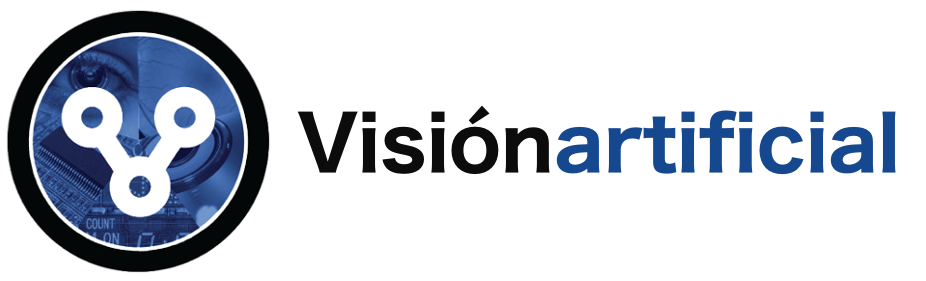

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

# 1. Benvidos ao curso de VA

[Táboa de contidos](./TaboaContidos.ipynb)

Os `notebooks` que se presentarán aos estudantes teñen como meta presentar os tópicos fundamentais da materia cun *espíritu interactivo*. Para isto empregamos a ferramenta Jupyter Notebook, para que o *lector* poida, poida aprender a teoría detras das técnicas fundamentaris da visión artificial, experimentar con elas executando e modificando o código. Esta materia está dividida en temas, e cada un deles cubre diferentes problematicas do campo: deteción de bordes, segmentación de rexións, aprendizaxe máquina, visión estéreo, etc. (Para unha lista detallada, bótalle un vistazo á [Táboa de contidos](./TaboaContidos.ipynb)).

Empecemos cunha breve introdución ...

## 1.1 Que é a Visión Artificial?

Hai varias definición aceptadas:

- Ao proceso de **extraer información** das imaxes empregando un ordenador (software).
- Un sistema que realiza **tarefas como o faría un humano**. Estes encargos podes ir dende a detección de simples obxectos ata a interpretación semática dunha escena complexa (ver Fig. 1. e Fig. 2).

<img src="./images/computer_vision_input_and_output.png" width=600>
$\\[2pt]$
<center><i>Fig 1. Entrada e saída dun sistema típico de Visión Artificial.</i></center>

<img src='./images/scene_understanding_example.png' width=550/>
$\\[2pt]$
<center><i>Fig 2. Exemplo de interpretación de escenas.</i></center>

A Visón artificial emprega/aporta técnicas doutros campos próximos:
- **Image processing/Procesado de Imaxe** (IP): suavizado imaxes, realce de imaxes, etc.
- **Machine learning/Aprendizaxe Máquina** (ML): modelos de clasificación, algoritmos de detección, etc.
- **Computer graphics/gráficos e óptica** (CG): modelos de cámara, modelos de iluminación, etc.

Á súa vez, cada problema de visión por computador pode requirir unha intervención diferente de ferramentas de cada un destes campos. Por exemplo:

- Detección de caras: &#8593; IP, &#8593; ML, &#8595; CG
- Localización da cámara: &#8595; IP, &#8595; ML, &#8593; CG
- Inspección industrial: &#8593; IP, &#8595; ML, &#8595; CG


Para máis detalles sobre o problema de detección de caras, normalmente utilízanse técnicas de IP para mellorar a calidade da imaxe a analizar, mentres que un modelo de aprendizaxe automática é o encargado de decidir en que áreas desta imaxe mellorada conteñen caras. 

As técnicas de visión artificial que abordan estes problemas permiten unha ampla gama de **aplicacións do mundo real**. Por citar algúns: 
- Industria (liñas de produción),
- Menciña (reconto de células, diagnóstico mediante ecografía ou resonancia magnética,etc.),
- Seguridade e video-vixiancia,
- Condución asistida,
- Robotica (guiado visual de brazos robóticos, navegación automática de robots, adquisición de coñecemento sobre o entorno, etc.),
- Ocio e vido-xogos,
- Interfaces persoa-máquina, etc.

Non obstante, a pesar das perspectivas prometedoras destas tecnoloxías, a visión por computador ten un lado oculto ... 

## 1.2 Por que é difícil a visión artificial? 

Pode parecer que extraer información dunha imaxe non é un gran desafío. De feito, para os humanos son tarefas sinxelas. Non obstante, para un ordenador, que interpreta unha imaxe como unha matriz de números entre [0, 255], as cousas complícanse. 

Por exemplo, non tes problema en interpretar o obxecto desta imaxe como unha flor (bonita): 

<img src="./images/flower.jpg" width=350/>
$\\[2pt]$
<center><i>Fig 3. Exempo dunha imaxe cunha flor.</i></center>

Pero como ve esta imaxe un ordenador? Executa a seguinte cela de código para descubrila. 

In [9]:
import numpy as np
import cv2

images_path = './images/'
np.set_printoptions(threshold=np.inf)

# Lemos unha imaxe en niveles de gris
image = cv2.imread(images_path + 'flower_low.jpg',cv2.IMREAD_GRAYSCALE)
# visualizamola en pantalla
print(image)

[[ 38  40  42  46  42  39  46  46  14  12  11   8   7  15   3  10  17  32
   22  12  10  10  14  10  20  24  24  16  10   8  12  16  37  44  47  38
   36  25  10  26  29  44  49  31  23  35  37  33  13  10  15  30  42  41
   35  33  18  33  55  60  47  39  36  27  32  42  51  63  60  57  51  70
   64  44  50  37  49  76  82 122 146 134 116 101  98  93  95 114 119  88
   80  66  67  89 130 150 147]
 [ 42  44  42  44  43  43  44  33  15  12  10  12  18  30  19  21  32  32
   17  12  18  22  24  14  10  20  22  18  17  15  12  11  30  33  42  44
   39  21  11  34  56  56  46  30  32  46  47  38  27  23  15  18  39  54
   52  44  39  38  43  40  26  24  34  39  30  52  58  55  52  58  64  74
   63  56  57  50  49  62  84 120 143 132 118  99  87  90  99 106  89  85
   74  75 103 132 140 153 154]
 [ 39  42  41  43  44  45  43  28  23  24  23  23  20  30  27  32  36  34
   30  36  45  45  33   9   7  18  19  23  38  38  24  18  31  39  52  54
   46  31  26  43  60  55  40  30  39  56  55  42 

Así é como o ordenador ve unha versión reducida en escala de grises da imaxe que contén a nosa flor. Non obstante, a cantidade de información numérica a interpretar é enorme. Poderías detectar a flor detrás dos números? en caso afirmativo, data e coñecer ao mundo porque eres un caso único! 

Ademais, unha serie de problemas dificultan o proceso de extracción de información: 
- **Indeterminación** na proxección da palabra real a imaxe e viceversa: 
  - unha imaxe non é suficiente para sacar conclusións sobre a profundidade. 
  - Pode darse infinitas interpretacións para unha imaxe. 
- **Ruido**: as imaxes están afectadas por ruídos de distinta natureza. 
- **A luz** marca a diferenza: a aparencia dun obxecto pode variar dependendo das condicións de iluminación, polo que é un factor a ter en conta (controlada en entornos industriais). 
- Varios **factores acoplados**. Por exemplo, a cor e a textura dun obxecto, a súa forma e as condicións de iluminación poden influír na intensidade dos píxeles na imaxe.  
- Inmensa **cantidade de datos**:
    - Imaxe en cor: cerca de 3 MB para unha resolución de 768x1024 (768x1024x3 bytes).
    - Secuencia de vídeo: preto de 75 MB/s (30 images/s.).
    - En moitas aplicacións é necesario procesar esta enorme cantidade de datos en tempo real (> 30Hz).

## 1.3 Recapitulación

Neste caderno, aprendemos como as técnicas de visión por computadora tratan eses problemas e como se aplican para resolver problemas e desafíos do mundo real. Emocionante, non si?

**Iniciemos a viaxe e intentade disfrutala sen agobios de exames!** 